# Example #1: Numerical Modeling Applications with Python - Diffusion of Random Particles

In this exercise, we will be simulating the random movement of particles and plotting their distributions through time with a [random walk model](https://en.wikipedia.org/wiki/Random_walk). We will be learning and utilizing these skills:

- Creating arrays of random numeric values with *numpy* & *random*
- For loops & if statements
- Plotting with *matplotlib*

*Optional*
- Animate plots with *IPython*

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import random

### 1. Model Setup

First, we need to establish some variables for our model:

In [2]:
# initial start time (seconds)
t0 = 0
# change in position each particle will undergo (random between positive & negative direction)
dx = 2
# number of particles
n = 10000
# model duration (seconds)
model_run = 1000

We also need a way to store all the data we will be generate in our model runs. We will use the **array** data type within the `numpy` library to do this:

In [3]:
# create an array with all particle numbers
nP = np.arange(1,n+1)
print(nP)

# create an empty array to store initial particle positions (all starting at 0)
x = np.zeros_like(nP)
print(x)

[    1     2     3 ...  9998  9999 10000]
[0 0 0 ... 0 0 0]


Now we're ready to construct our model! What we are going to simulate is the random movement of 400 particles every second based on a predetermined range of movement (in this case, 2 units). Each particle will either move 2 units to the left or 2 units to the right - we'll let Python decide! To see how our distribution of particles evolves, we will also be plotting histograms of the particle positions periodically as the model runs. 

This model uses the `numpy`, `random`, & `matplotlib` libraries. We will be using a **for loop** to specify how long we want our model to run, and **if statements** for our plots.

### 2.1 Model Construction - Particle Movement

The first step in running our model is to randomly move every particle by our step size defined above. This will require using the `random` library, our numpy array, and a for loop:

In [4]:
# write a line of code that shifts the first particle randomly left or right by dx
## remember we constructed an array x with all of our particle positions!
x[0] += random.choice([-dx,dx])
print(x[0])

2


In [5]:
# re-initialize starting position for first particle
x[0] = 0

# write a for loop that randomly moves all particles using line of code above
for i in range (0,n):
    x[i] += random.choice([-dx,dx])
    
# let's look at our new array:
print(x)

[ 2 -2 -2 ...  2  2  2]


### 2.2 Model Construction - Plotting Particle Position

The second piece of model involves visualizing particle positions with a histogram. We will be using the `matplotlib` library for this section, and adding customization to our figures to make them look nice. Let's begin by plotting our newly changed 'x' array:

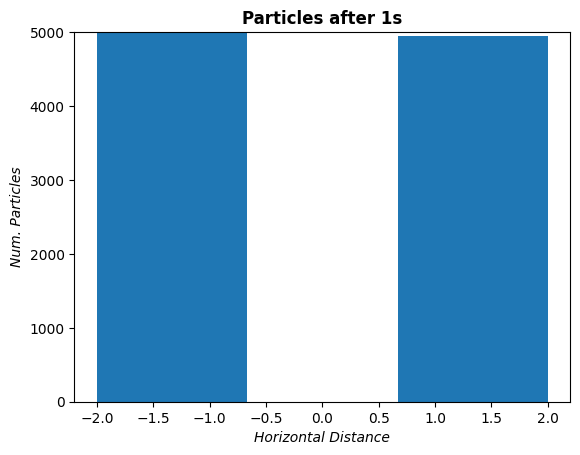

In [6]:
# create a histogram of particle positions
plt.hist(x,bins=3)

# add a title
## optional: add bold
plt.title('Particles after 1s', weight='bold')

# add X & Y axis labels
## optional: add italics
plt.xlabel('Horizontal Distance',style='italic')
plt.ylabel('Num. Particles',style='italic')

# set a Y axis limit
plt.ylim([0,5e3])

# show the plt
plt.show()

Looks great! It's not the most exciting histogram right now, but it will look cool as we visualize our particle movements over much larger timesteps. 

We have now written the two parts of our model, and are ready to bring everything together to run over our entire model duration.

### 3. Run the Model!

For this section, we will be placing our model components inside another for loop that runs for a specified time interval. We will also be adding an **if statement** to plot at various time intervals, so we don't get a plot every time step.

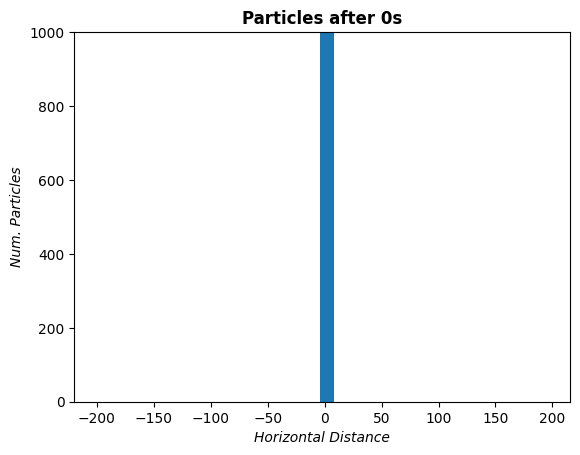

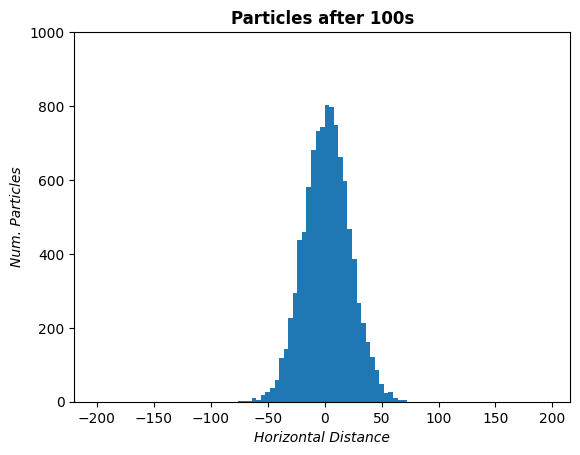

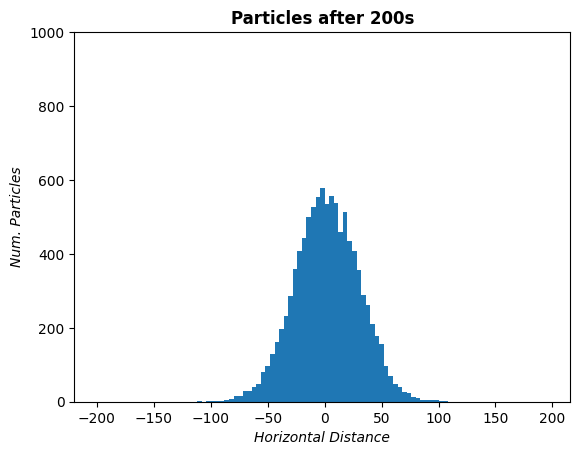

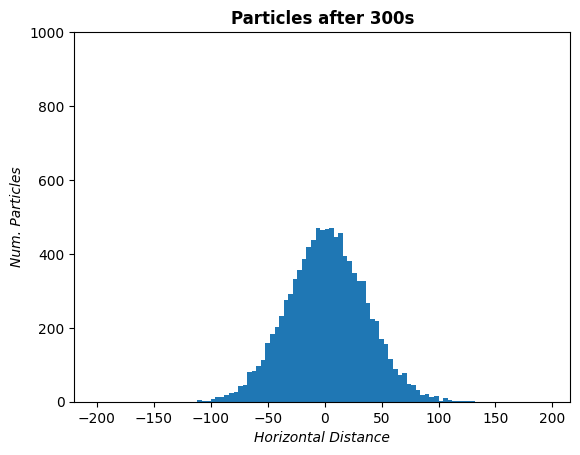

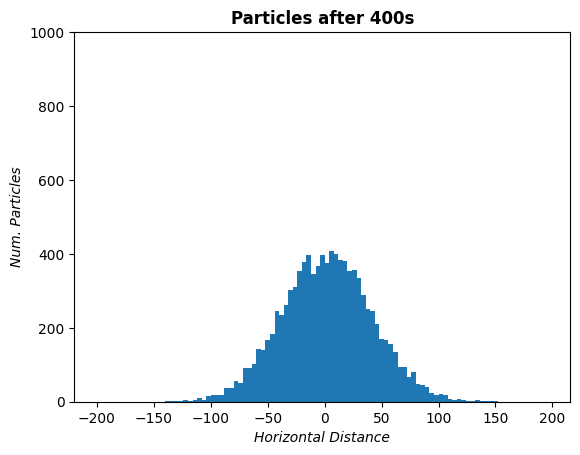

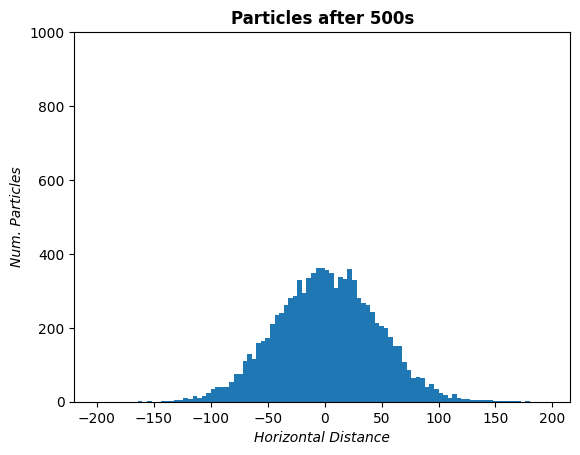

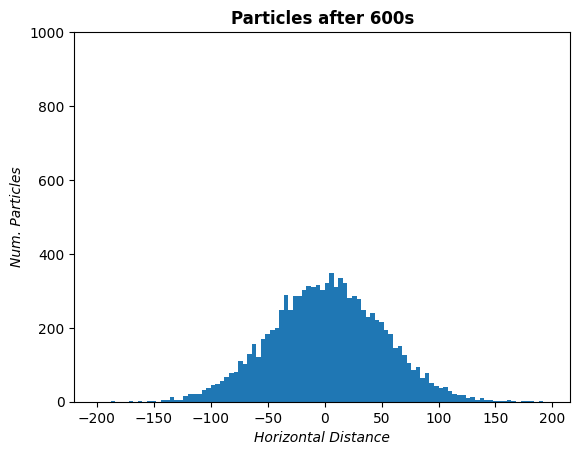

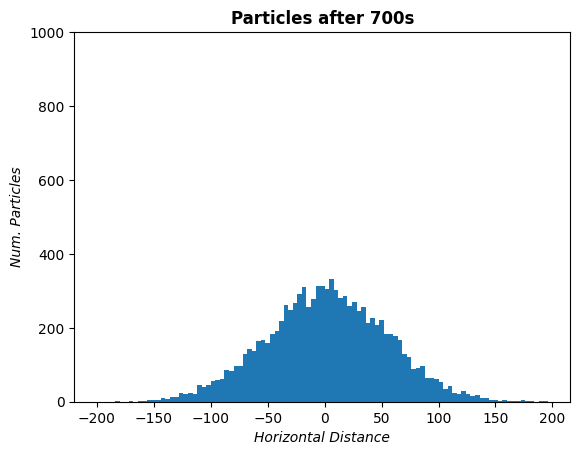

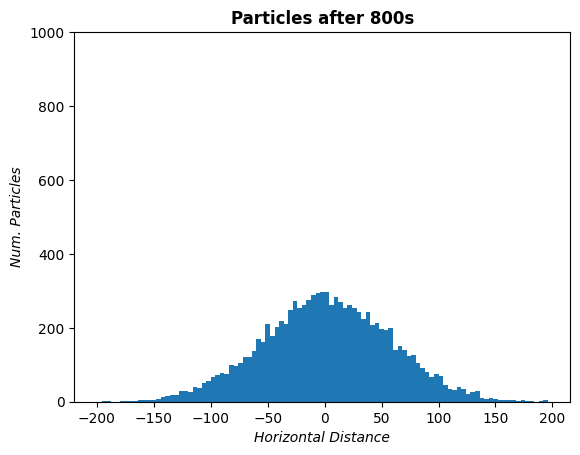

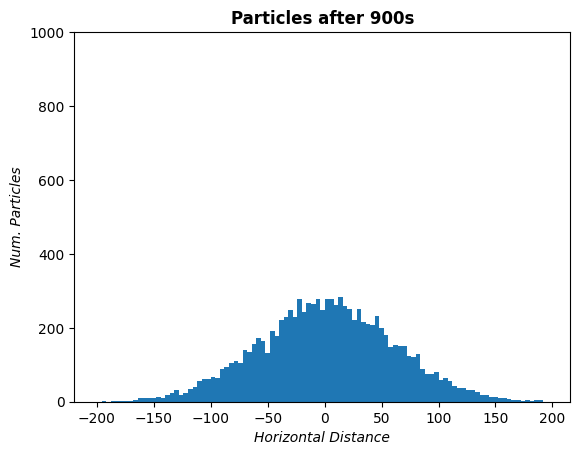

In [7]:
# write a for loop that will run for the entire model duration
for t in range(t0,model_run):
    # for each particle, shift the position randomly left or right by dx
    for i in range(0,n-1):
        x[i] += random.choice([-dx,dx])
    # write an if statement that plots every 100 seconds
    if t%100==0:
        # add plotting code. note we are replacing the number of bins with a numpy array
        plt.hist(x,bins=np.arange(-200,200,4))
        # add a title using string concatenation
        plt.title('Particles after ' + str(t) + 's',weight='bold')
        # add X & Y axis labels
        plt.xlabel('Horizontal Distance',style='italic')
        plt.ylabel('Num. Particles',style='italic')
        # set a Y axis limit
        plt.ylim([0,1e3])
        # show the plot at each time step
        plt.show()

Congratulations! We just constructed a random walk model that simulated the movement of particles in a system. Note that our particles organized into a Gaussian distribution (don't remember what that is? John should be covering that in his course **Probability & Statistics** later in the summer!). This concludes the recommended portion of the numerical modeling section of this class.

### Optional: Animate our Plots

Using the `IPython` Library, we can also make cool animations of our plots...

In [8]:
# import clear_output from IPython
from IPython.display import clear_output

In [9]:
# re-initialize our starting positions at 0
x = np.zeros_like(nP)

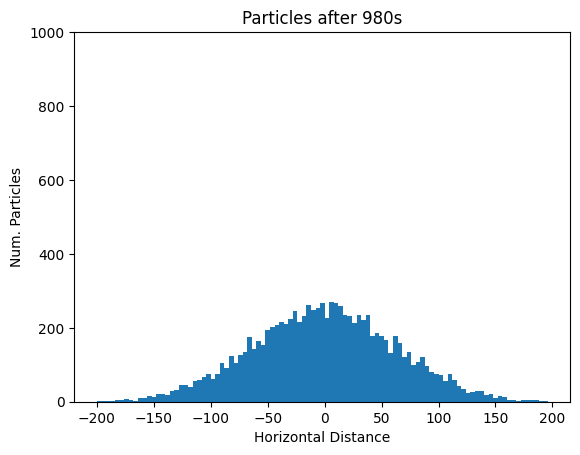

In [10]:
# run the model again
for t in range(t0,model_run):
    for i in range(0,n):
        x[i] += random.choice([-dx,dx])
    # plot every 20 seconds
    if t%20==0:
        # add line before generating plot for animation!
        clear_output(wait=True)
        plt.hist(x,bins=np.arange(-200,200,4))
        plt.title('Particles after ' + str(t) + 's')
        plt.xlabel('Horizontal Distance')
        plt.ylabel('Num. Particles')
        plt.ylim([0,1e3])
        plt.show()